<a href="https://colab.research.google.com/github/inesleonidasrocha/DataVisualization-2023/blob/main/DataVisInes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 103.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
#import geopandas as gpd
from pandas.io.json import json_normalize

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import numpy as np

import folium

import json

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
data = pd.read_csv('/content/drive/MyDrive/Propriedades_clean.csv')
#data = pd.read_csv('Propriedades_clean.csv')
data.head()

,Tipo,Titulo,Preço,Condição,Quartos,WC,Dimensão m2,Link,Data,Cidade,Tipo_id
0,Apartamento,Apartamento T2 - Empreendimento Cerrado da Fonte,400000.0,Em construção,2.0,2.0,80.00,https://www.imovirtual.com/pt/anuncio/apartame...,2022-10-02,Lisboa,0
1,Apartamento,Apartamento TO ao Pólo Universitário do Porto,170000.0,Usado,0.0,2.0,35.87,https://www.imovirtual.com/pt/anuncio/apartame...,2022-10-02,Porto,0
2,Apartamento,Apartamento T4 para venda,220000.0,Usado,4.0,2.0,99.30,https://www.imovirtual.com/pt/anuncio/apartame...,2022-10-02,Lisboa,0
3,Apartamento,APARTAMENTO T3 COM EXCELENTE EXPOSIÇÃO SOLAR E...,159000.0,Usado,3.0,2.0,110.00,https://www.imovirtual.com/pt/anuncio/apartame...,2022-10-02,Santarém,0
4,Apartamento,Apt. T2 - Condomínio Fechado com varanda de 8 m2.,333000.0,Novo,2.0,2.0,98.00,https://www.imovirtual.com/pt/anuncio/apt-t2-c...,2022-10-02,Porto,0


In [80]:
data_unique = data[~data['Link'].duplicated()]
data_unique['Link'].value_counts()

https://www.imovirtual.com/pt/anuncio/apartamento-t2-empreendimento-cerrado-da-fonte-ID19eoH.html#ab04badaa0               1
https://www.imovirtual.com/pt/anuncio/moradia-t4-individual-em-nogueira-ID1aHp7.html#f46d972c33                            1
https://www.imovirtual.com/pt/anuncio/moradia-t3-escritorio-na-folgosa-da-maia-maia-ID1aIKs.html#db508dc549                1
https://www.imovirtual.com/pt/anuncio/moradia-v4-para-venda-em-ferragudo-ID1aHkA.html#db508dc549                           1
https://www.imovirtual.com/pt/anuncio/moradia-t3-em-banda-em-ferreiros-braga-ID1aIKY.html#f46d972c33                       1
                                                                                                                          ..
https://www.imovirtual.com/pt/anuncio/nova-acabamentos-de-eleicao-vista-mar-super-isolamento-ID19p58.html#b9127dda57       1
https://www.imovirtual.com/pt/anuncio/moradia-t1-remodelado-com-sotao-na-torre-da-marinha-ID18m4O.html#e0e511345c          1


In [81]:
data = data_unique
data['Link'].value_counts()

https://www.imovirtual.com/pt/anuncio/apartamento-t2-empreendimento-cerrado-da-fonte-ID19eoH.html#ab04badaa0               1
https://www.imovirtual.com/pt/anuncio/moradia-t4-individual-em-nogueira-ID1aHp7.html#f46d972c33                            1
https://www.imovirtual.com/pt/anuncio/moradia-t3-escritorio-na-folgosa-da-maia-maia-ID1aIKs.html#db508dc549                1
https://www.imovirtual.com/pt/anuncio/moradia-v4-para-venda-em-ferragudo-ID1aHkA.html#db508dc549                           1
https://www.imovirtual.com/pt/anuncio/moradia-t3-em-banda-em-ferreiros-braga-ID1aIKY.html#f46d972c33                       1
                                                                                                                          ..
https://www.imovirtual.com/pt/anuncio/nova-acabamentos-de-eleicao-vista-mar-super-isolamento-ID19p58.html#b9127dda57       1
https://www.imovirtual.com/pt/anuncio/moradia-t1-remodelado-com-sotao-na-torre-da-marinha-ID18m4O.html#e0e511345c          1


In [51]:
cidades_da_treta = set(data.Cidade)

for i in cidades_da_treta:
  print(i)
  print(data[data.Cidade == i].corr(method = 'spearman'))

Pico
                Preço   Quartos        WC  Dimensão m2   Tipo_id   preçoM2
Preço        1.000000  0.496673  0.437266     0.522709 -0.056943  0.709156
Quartos      0.496673  1.000000  0.415049     0.657263  0.018339  0.060424
WC           0.437266  0.415049  1.000000     0.404049       NaN  0.171578
Dimensão m2  0.522709  0.657263  0.404049     1.000000 -0.071430 -0.189492
Tipo_id     -0.056943  0.018339       NaN    -0.071430  1.000000 -0.144527
preçoM2      0.709156  0.060424  0.171578    -0.189492 -0.144527  1.000000
Coimbra
                Preço   Quartos        WC  Dimensão m2   Tipo_id   preçoM2
Preço        1.000000  0.344942  0.556340     0.425138 -0.219203  0.681352
Quartos      0.344942  1.000000  0.521629     0.649793  0.302917 -0.102174
WC           0.556340  0.521629  1.000000     0.533399  0.020218  0.148578
Dimensão m2  0.425138  0.649793  0.533399     1.000000  0.357489 -0.301242
Tipo_id     -0.219203  0.302917  0.020218     0.357489  1.000000 -0.575641
preçoM2     

In [52]:
data['Data']

0         2022-10-02
1         2022-10-02
2         2022-10-02
3         2022-10-02
4         2022-10-02
             ...    
322439    2023-03-19
322440    2023-03-19
322441    2023-03-19
322442    2023-03-19
322443    2023-03-19
Name: Data, Length: 320189, dtype: object

In [53]:
data.columns

Index(['Tipo', 'Titulo', 'Preço', 'Condição', 'Quartos', 'WC', 'Dimensão m2',
       'Link', 'Data', 'Cidade', 'Tipo_id', 'NUTS2', 'preçoM2'],
      dtype='object')

<ipython-input-54-1984c56fc15e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

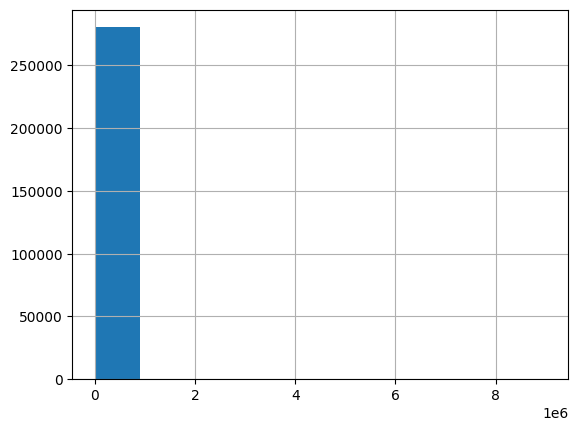

In [54]:
data["preçoM2"] = data["Preço"] / data["Dimensão m2"]

data["preçoM2"].hist()

In [55]:
data.head(2)

,Tipo,Titulo,Preço,Condição,Quartos,WC,Dimensão m2,Link,Data,Cidade,Tipo_id,NUTS2,preçoM2
0,Apartamento,Apartamento T2 - Empreendimento Cerrado da Fonte,400000.0,Em construção,2.0,2.0,80.00,https://www.imovirtual.com/pt/anuncio/apartame...,2022-10-02,Lisboa,0,Área Metropolitana de Lisboa,5000.000000
1,Apartamento,Apartamento TO ao Pólo Universitário do Porto,170000.0,Usado,0.0,2.0,35.87,https://www.imovirtual.com/pt/anuncio/apartame...,2022-10-02,Porto,0,Norte,4739.336493


In [56]:
data['Condição'].value_counts()[:10]

Usado                                             101618
Novo                                               52605
Em construção                                      49161
Renovado                                           25263
Para recuperar                                     18498
Ruína                                               1398
Novo Empreendimento AURYA - Tipologias T2 e T3        64
Novo Empreendimento T2, T3 e T4                       40
Novo apartamento T3 - Requesende                      24
Novo Empreendimento na Ribeira Brava                  18
Name: Condição, dtype: int64

In [57]:

city_to_nuts2 = {
    "Viana do Castelo": "Norte",
    "Braga": "Norte",
    "Vila Real": "Norte",
    "Porto": "Norte",
    "Bragança": "Norte",
    #--------
    "Aveiro": "Centro",
    "Coimbra": "Centro",
    "Leiria": "Centro",
    "Viseu": "Centro",
    "Castelo Branco": "Centro",
    "Guarda": "Centro",
     #--------
    "Lisboa": "Área Metropolitana de Lisboa",
    "Setúbal": "Área Metropolitana de Lisboa",
    #----
     "Beja": "Alentejo",
     "Évora": "Alentejo",
     "Portalegre": "Alentejo",
     "Santarém": "Alentejo",
     #---    
    "Faro": "Algarve",
    #----
     "Corvo": "Região Autónoma dos Açores",
     "Pico": "Região Autónoma dos Açores",
     "Terceira": "Região Autónoma dos Açores",
     "Faial": "Região Autónoma dos Açores",
     "Flores": "Região Autónoma dos Açores",
     "Graciosa": "Região Autónoma dos Açores",
     "Miguel": "Região Autónoma dos Açores",
     "Maria": "Região Autónoma dos Açores",
     "Flores": "Região Autónoma dos Açores",
     "São Jorge": "Região Autónoma dos Açores",
  
     #---
    "Madeira": "Região Autónoma da Madeira",
    "Santo": "Região Autónoma da Madeira",
  
}

# Use the map() function to apply the mapping to the city column
data["NUTS2"] = data["Cidade"].map(city_to_nuts2)


<ipython-input-57-eb819248462b>:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
scatter_data = []
#aqui depois podemos meter pelo input do utilizador
cidade = "Flores"

#Filtering the dataframe to only show the row that corresponds to the city selected
dados_cidade = data.loc[data['Cidade'] == cidade]

# Create a scatter plot trace for dados_cidade
trace = dict(type='scatter',
             y=dados_cidade['Preço'],
             x=dados_cidade['Dimensão m2'],
             text=dados_cidade['Tipo'],
             mode='markers')

scatter_data.append(trace)

# Defining the layout
layout = dict(title=dict(text='Relação Preço Vs Dimensão das casas em m2: '+ cidade),
              xaxis=dict(title='Dimensão m2'),
              yaxis=dict(title='Preço'))

# Create the figure
scatter_fig = go.Figure(data= scatter_data, layout=layout)

# Show the figure
scatter_fig.show()


In [60]:
#Filtering the dataframe to only show the row that corresponds to the city selected
dados_condicao = data.loc[data['Condição'].isin(data['Condição'].value_counts().to_frame(name='count').query('count > 100').index)]
dados_condicao['Condição'].value_counts()

Usado             101618
Novo               52605
Em construção      49161
Renovado           25263
Para recuperar     18498
Ruína               1398
Name: Condição, dtype: int64

In [61]:

# Calcular a contagem de valores de cada condição
count_data = dados_condicao['Condição'].value_counts()

# Criar o gráfico de pizza
fig = px.pie(values=count_data, names=count_data.index)
fig.show()



In [62]:

fig = px.sunburst(dados_condicao, path=['Tipo','Condição'])
fig.show()

In [63]:

fig = px.sunburst(dados_condicao, path=['Condição','Tipo'])
fig.show()

In [64]:
fig = px.histogram(data, x="Quartos")
fig.show()

In [78]:
data.describe()

AttributeError: ignored

In [66]:
#pensar em tirar esta casa
data[data['Dimensão m2'] == data['Dimensão m2'].max()]

,Tipo,Titulo,Preço,Condição,Quartos,WC,Dimensão m2,Link,Data,Cidade,Tipo_id,NUTS2,preçoM2
126861,Moradia,"Beja - Herdade com 1.300 Ha , Olival intensivo...",55000000.0,NaN,1.0,NaN,1.300000e+09,https://www.imovirtual.com/pt/anuncio/beja-her...,2022-10-02,Beja,1,Alentejo,0.042308
191014,Moradia,"Beja - Herdade com 1.300 Ha , Olival intensivo...",55000000.0,NaN,1.0,NaN,1.300000e+09,https://www.imovirtual.com/pt/anuncio/beja-her...,2022-11-06,Beja,1,Alentejo,0.042308


In [82]:
data[data['Preço'] == data['Preço'].max()]

,Tipo,Titulo,Preço,Condição,Quartos,WC,Dimensão m2,Link,Data,Cidade,Tipo_id
230017,Moradia,Moradia Isolada V4+1 Praia Verde,1.600000e+09,Usado,4.0,NaN,200.0,https://www.imovirtual.com/pt/anuncio/moradia-...,2023-03-18,Faro,1


In [116]:
# Group the data by city and compute the mean price
city_prices = data.groupby('Cidade')['Preço'].mean()

# Create a horizontal bar chart
fig = go.Figure(go.Bar(
    x=city_prices.values,
    y=city_prices.index,
    orientation='h'
))

fig.update_layout(
    title='Average Price per City',
    xaxis_title='Price',
    yaxis_title='City'
)

fig.show()


In [113]:
#https://plotly.com/python/horizontal-bar-charts/

# group by city and count the number of ads
ads_per_city = data.groupby('Cidade').size().reset_index(name='Count')

# group by city and calculate the mean price
mean_price_per_city = data.groupby('Cidade')['Preço'].mean().reset_index(name='MeanPrice')

# sort by count in descending order
ads_per_city = ads_per_city.sort_values('Count', ascending=False)

# create a figure with two subplots
fig = make_subplots(rows=1, cols=2, shared_yaxes=True, horizontal_spacing=0.05)

# add the bar chart for number of ads
fig.add_trace(go.Bar(x=ads_per_city['Count'], y=ads_per_city['Cidade'], orientation='h', name='Number of houses listed'), row=1, col=1)

# add the line chart for mean price
mean_price_per_city = mean_price_per_city.set_index('Cidade') # set index to city for easy indexing
mean_price_per_city_sorted = mean_price_per_city.loc[ads_per_city['Cidade']] # sort by the sorted index
fig.add_trace(go.Scatter(x=round(mean_price_per_city_sorted['MeanPrice'],2), y=ads_per_city['Cidade'], mode='lines+markers', name='Average House Price'), row=1, col=2)

# update the layout
fig.update_layout(title='House listing and Average price per city', height=800, width=800, xaxis2_tickprefix="€", xaxis2_tickformat=',',xaxis1_tickformat=',',
                  yaxis=dict(title='City', autorange='reversed', showgrid=False, showline=False, showticklabels=True, tickfont=dict(size=8), tickangle=0),
                  xaxis=dict(title='Number of House ads listed', showgrid=False, showline=False, showticklabels=True, range=[0, max(ads_per_city['Count'])+1000]),
                  xaxis2=dict(title='Average House Price', showgrid=False, showline=False, showticklabels=True, range=[0, max(mean_price_per_city['MeanPrice'])+20000]),
                  legend=dict(orientation='h', yanchor='top', y=1.15, xanchor='center', x=0.5),
                  margin=dict(l=50, r=50, t=50, b=50), font=dict(size=10))

# show the figure
fig.show()
